-----

-----

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
# Cargar todas las librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats




## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames

df_users = pd.read_csv('/datasets/megaline_users.csv')

print(df_users)



     user_id first_name   last_name  age  \
0       1000   Anamaria       Bauer   45   
1       1001     Mickey   Wilkerson   28   
2       1002     Carlee     Hoffman   36   
3       1003   Reynaldo     Jenkins   52   
4       1004    Leonila    Thompson   40   
..       ...        ...         ...  ...   
495     1495      Fidel      Sharpe   67   
496     1496      Ariel    Shepherd   49   
497     1497      Donte     Barrera   49   
498     1498       Scot  Williamson   51   
499     1499      Shena     Dickson   37   

                                          city    reg_date      plan  \
0        Atlanta-Sandy Springs-Roswell, GA MSA  2018-12-24  ultimate   
1              Seattle-Tacoma-Bellevue, WA MSA  2018-08-13      surf   
2         Las Vegas-Henderson-Paradise, NV MSA  2018-10-21      surf   
3                                Tulsa, OK MSA  2018-01-28      surf   
4              Seattle-Tacoma-Bellevue, WA MSA  2018-05-23      surf   
..                                     

In [3]:
df_calls = pd.read_csv('/datasets/megaline_calls.csv')

print(df_calls)

              id  user_id   call_date  duration
0        1000_93     1000  2018-12-27      8.52
1       1000_145     1000  2018-12-27     13.66
2       1000_247     1000  2018-12-27     14.48
3       1000_309     1000  2018-12-28      5.76
4       1000_380     1000  2018-12-30      4.22
...          ...      ...         ...       ...
137730  1499_199     1499  2018-11-21      8.72
137731  1499_200     1499  2018-10-20     10.89
137732  1499_201     1499  2018-09-21      8.12
137733  1499_202     1499  2018-10-10      0.37
137734  1499_203     1499  2018-12-29     13.86

[137735 rows x 4 columns]


In [4]:
df_messages = pd.read_csv('/datasets/megaline_messages.csv')

print(df_messages)

             id  user_id message_date
0      1000_125     1000   2018-12-27
1      1000_160     1000   2018-12-31
2      1000_223     1000   2018-12-31
3      1000_251     1000   2018-12-27
4      1000_255     1000   2018-12-26
...         ...      ...          ...
76046  1497_526     1497   2018-12-24
76047  1497_536     1497   2018-12-24
76048  1497_547     1497   2018-12-31
76049  1497_558     1497   2018-12-24
76050  1497_613     1497   2018-12-23

[76051 rows x 3 columns]


In [5]:
df_internet = pd.read_csv('/datasets/megaline_internet.csv')

print(df_internet)

              id  user_id session_date  mb_used
0        1000_13     1000   2018-12-29    89.86
1       1000_204     1000   2018-12-31     0.00
2       1000_379     1000   2018-12-28   660.40
3       1000_413     1000   2018-12-26   270.99
4       1000_442     1000   2018-12-27   880.22
...          ...      ...          ...      ...
104820  1499_215     1499   2018-10-20   218.06
104821  1499_216     1499   2018-12-30   304.72
104822  1499_217     1499   2018-09-22   292.75
104823  1499_218     1499   2018-12-07     0.00
104824  1499_219     1499   2018-12-24   758.31

[104825 rows x 4 columns]


In [6]:
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

print(df_plans)

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

In [7]:
print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [8]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None


In [9]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB
None


In [10]:
print(df_users.isna().sum())

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64


In [11]:
print(df_users['churn_date'].sample(15))

120           NaN
408           NaN
150           NaN
41            NaN
316           NaN
299           NaN
445           NaN
211           NaN
413           NaN
354           NaN
9             NaN
186    2018-12-31
474           NaN
329           NaN
20            NaN
Name: churn_date, dtype: object


In [12]:
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')

print(df_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


In [13]:
df_users['churn_date'] = df_users['churn_date'].fillna(pd.to_datetime('2019-01-01'))

print(print(df_users['churn_date'].sample(15)))

358   2018-10-22
87    2019-01-01
359   2019-01-01
260   2019-01-01
422   2019-01-01
314   2019-01-01
205   2019-01-01
129   2018-12-27
363   2018-08-16
426   2019-01-01
13    2019-01-01
401   2019-01-01
301   2019-01-01
483   2019-01-01
241   2019-01-01
Name: churn_date, dtype: datetime64[ns]
None


In [14]:
print(df_users.duplicated().sum())

0


Observaciones:
    
- Se cambio el tipo de dato de "Object"  a  en "reg_date" y "churn_date"
    
De 500 filas en la fecha, hay 466 valores nulos en la columa "churn_date" lo que represanta más del 90 % de los datos asi que no se podian eliminar
y fueron remplazadas con una fecha estandar la cual fue con la fecha "primero de enero de 2019", indicando que la mayoria de 
usuarios seguian usando  su plan.

-No se encontraron valores duplicados

In [15]:
print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [16]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')

print(df_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


In [17]:
print(df_calls.duplicated().sum())

0


In [18]:
print(df_calls.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


Observaciones:

- Id no se cambió a entero ya que el user id contiene un guion bajo por lo cual se dejo como "object"
- se cambió la columna "call_date" de "object" a "datetime64" ya que indica una fecha.
- No se encontraron valores duplicados ni ausentes.

In [19]:
print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [20]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')

print(df_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [21]:
print(df_messages.duplicated().sum())

0


In [22]:
print(df_calls.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


Observaciones:
    
-Se cambio el tipo de dato de object a datetime  en 'message_date' ya que contiene una fecha.
-No se encontraron valores ausentes ni duplicados.

In [23]:
print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


In [24]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')

print(df_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


In [25]:
print(df_internet.duplicated().sum())

0


In [26]:
print(df_calls.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


Observaciones:

-se cambió de "object" a datetime la columa "session_date".

-No se encontraron valores duplicados ni nulos.

In [27]:
print(df_plans.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [28]:
print(df_plans.duplicated().sum())

0


In [29]:
print(df_calls.isna().sum())

id           0
user_id      0
call_date    0
duration     0
dtype: int64


Observaciones
No se hizo ninguna conversion en el tipo de dato ya que estan representados de forma correcta

-No se encontraron valores nulos ni duplicados


## Tarifas

In [30]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas

print(df_plans.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [31]:
# Imprime una muestra de los datos para las tarifas

print(df_plans.head())



   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


No se encontaron datos faltantes ni duplicados y los tipos de datos son correctos
,sin embargo mb_per_month_included estan en MB y no estan redondeados a GB por lo cual se tendrian que redondear para tener la tarifa correcta qye se le cobrara utilizando numpy

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [32]:
df_plans['gb_per_month_included'] = np.ceil(df_plans['mb_per_month_included'] / 1024)

print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


## Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [33]:
df_plans['gb_per_month_included'] = np.ceil(df_plans['mb_per_month_included'] / 1024)

print(df_plans)


   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   gb_per_month_included  
0                   15.0  
1                   30.0  


Se agregó una nueva columna con el nombre "gb_per_month_included" para tener la información de GB al mes.

## Usuarios/as

In [34]:
# Imprime la información general/resumida sobre el DataFrame de usuarios


print(df_users.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


In [35]:
print(df_users.describe())

           user_id         age
count   500.000000  500.000000
mean   1249.500000   45.486000
std     144.481833   16.972269
min    1000.000000   18.000000
25%    1124.750000   30.000000
50%    1249.500000   46.000000
75%    1374.250000   61.000000
max    1499.000000   75.000000


In [36]:
# Imprime una muestra de datos para usuarios

print(df_users.sample(20))

     user_id first_name last_name  age  \
436     1436    Jennine    Kinney   69   
301     1301      Tomas    Horton   64   
175     1175     Shiloh  Stafford   25   
451     1451     Lenard   Harding   53   
487     1487      Elton   Simpson   18   
454     1454   Kymberly     Cohen   56   
50      1050       Jone      Owen   23   
45      1045     Barney    Ortega   20   
417     1417      Jorge    Madden   51   
240     1240      Drema     Lopez   61   
387     1387   Raymonde      Lowe   28   
330     1330       Tobi    Kinney   48   
4       1004    Leonila  Thompson   40   
378     1378   Mckinley   Clayton   22   
164     1164        Kam    Macias   31   
486     1486       Sang     Solis   29   
84      1084      Wiley  Mckinney   21   
283     1283       Alan   Burgess   38   
258     1258        Kai   Russell   39   
430     1430      Myung      Pugh   63   

                                                city   reg_date      plan  \
436  Philadelphia-Camden-Wilmington, PA-

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

Al analizar el data frame "users" se corrigió previamente los datos al cambiar los datos a columna de fecha de las columnas reg_date  day y churn_date .

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

Tambien se enriquecieron previamente los datos  identificando y llenando los valores nulos en la fecha poniendo una fecha estandar de primero de enero de 2019, que servirá como referencia para hacer el analisis y tomar en cuanta que los usuarios aun tenian el plan en esa fecha.

## Llamadas

In [37]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
print(df_calls.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


In [38]:
# Imprime una muestra de datos para las llamadas

print(df_calls.sample(20))


              id  user_id  call_date  duration
121625  1427_293     1427 2018-08-15      3.37
39979   1147_799     1147 2018-07-09      2.91
29394    1111_16     1111 2018-12-16      8.17
69303    1249_77     1249 2018-08-03      7.35
53244   1191_392     1191 2018-12-07     19.04
67984     1246_3     1246 2018-05-06      0.00
14372   1059_607     1059 2018-09-18     12.65
55625   1199_255     1199 2018-11-14      9.48
63757   1231_471     1231 2018-12-22     10.46
125971   1446_60     1446 2018-10-01      2.64
114243  1400_593     1400 2018-06-25     10.85
134781  1489_109     1489 2018-11-04      9.32
94355   1336_206     1336 2018-11-16      0.77
93991   1335_221     1335 2018-12-02      9.64
103898  1366_107     1366 2018-09-15      0.00
30341    1114_72     1114 2018-07-27     10.04
52644   1188_126     1188 2018-12-19      0.00
128766  1464_125     1464 2018-11-20      6.29
25787   1099_107     1099 2018-04-02      0.00
102758  1364_405     1364 2018-10-09      3.30


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]


Los datos no adecuados que no coincidian son el tipo de dato de la fecha en call_date la cual fue cambiada a tipo de dato data time. No se encontraron valores nulos ni duplicados

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

Se cambió el formato de la fecha utilizando el metodo to date time para que no hubiera problema al momento de analizar los datos.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [39]:
df_calls['duration_rounded'] = np.ceil(df_calls['duration'])

print(df_calls. sample(10)) 

              id  user_id  call_date  duration  duration_rounded
10418   1046_284     1046 2018-09-02      0.00               0.0
28634   1109_261     1109 2018-06-11     17.14              18.0
72009    1256_65     1256 2018-09-18      4.21               5.0
120417  1419_141     1419 2018-12-27      0.00               0.0
129951  1467_187     1467 2018-07-26      6.87               7.0
27286    1103_76     1103 2018-12-30      0.00               0.0
95354   1338_148     1338 2018-12-12      0.00               0.0
9844    1044_105     1044 2018-10-26      0.56               1.0
7986     1038_97     1038 2018-12-17      4.86               5.0
131984  1475_131     1475 2018-09-14      0.00               0.0


Como extra, se agrego otra fila en donde se redondean los minutos hacia arriba.

## Mensajes

In [40]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

print(df_messages. info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [41]:
# Imprime una muestra de datos para los mensajes

print(df_messages.sample(10))



             id  user_id message_date
54706  1346_209     1346   2018-12-25
66725  1434_259     1434   2018-10-21
27631   1172_88     1172   2018-11-24
30993  1194_152     1194   2018-10-23
44509   1296_11     1296   2018-10-25
28573  1174_363     1174   2018-08-17
35756   1236_21     1236   2018-11-22
56750  1361_102     1361   2018-07-05
23849  1144_337     1144   2018-11-24
62658   1394_47     1394   2018-09-25


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

Nuevamente en este data frame la fecha fue previamente cambiada de "object" a data time y no se encontraron valores nulos ni duplicados.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

No se encontraron aspectos extras en el data frame para enriquecerlo o que pudieran afectar el resultado del análisis. 

## Internet

In [42]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(df_internet.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


In [43]:
# Imprime una muestra de datos para el tráfico de internet

print(df_internet.sample(10))



             id  user_id session_date  mb_used
77195  1361_224     1361   2018-09-04   741.37
14050  1065_146     1065   2018-10-27   144.73
66307  1308_125     1308   2018-12-02   434.52
53406  1240_378     1240   2018-08-05   699.60
77398   1362_66     1362   2018-01-25  1231.09
23736  1109_314     1109   2018-06-16   639.01
25944   1121_37     1121   2018-12-07   396.69
5355   1029_151     1029   2018-09-03   376.20
593    1004_211     1004   2018-11-01   729.10
4742   1028_302     1028   2018-05-22   461.93


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]



### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

Se corrigi previamente la columna session_date cambiandola de tipo de dato a data time ya que indica una fecha, no se encontraron valores nulos ni duplicados.

-No se encuentra algun problema con los tipos de datos ya que la fecha fue modificada de object a date time y no se encontraron valores ausentes ni duplicados.

### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [44]:
df_internet['gb_used'] = np.ceil(df_internet['mb_used'] / 1024)

print(df_internet.sample(10))

             id  user_id session_date  mb_used  gb_used
71310  1332_283     1332   2018-08-30   528.88      1.0
17231  1077_351     1077   2018-01-21   536.79      1.0
11497  1056_164     1056   2018-11-11   676.27      1.0
33185  1150_176     1150   2018-11-28     0.00      0.0
69675   1325_77     1325   2018-12-28    13.49      1.0
96217   1450_13     1450   2018-12-14   265.78      1.0
49022   1220_21     1220   2018-05-18   235.01      1.0
41882   1187_59     1187   2018-08-30     0.00      0.0
28437   1131_20     1131   2018-06-03   140.14      1.0
81201  1380_183     1380   2018-12-09   100.08      1.0


Se agregó una columna extra redondeando los datos de megabytes a gigabytes para saber cuando sera la cantidad real que pagará el cliente.

## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [45]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

surf_conditions = """
Tarifa Surf:
- Pago mensual: $20
- Minutos incluidos: 500 minutos
- SMS incluidos: 50 SMS
- Datos incluidos: 15 GB

Costo adicional:
- Minuto extra: $0.03
- SMS extra: $0.03
- GB extra: $10
"""

print(surf_conditions)



Tarifa Surf:
- Pago mensual: $20
- Minutos incluidos: 500 minutos
- SMS incluidos: 50 SMS
- Datos incluidos: 15 GB

Costo adicional:
- Minuto extra: $0.03
- SMS extra: $0.03
- GB extra: $10



In [46]:
ultimate_conditions = """
Tarifa Ultimate:
- Pago mensual: $70
- Minutos incluidos: 3000 minutos
- SMS incluidos: 1000 SMS
- Datos incluidos: 30 GB

Costo adicional:
- Minuto extra: $0.01
- SMS extra: $0.01
- GB extra: $7
"""

print(ultimate_conditions)


Tarifa Ultimate:
- Pago mensual: $70
- Minutos incluidos: 3000 minutos
- SMS incluidos: 1000 SMS
- Datos incluidos: 30 GB

Costo adicional:
- Minuto extra: $0.01
- SMS extra: $0.01
- GB extra: $7



## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [47]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

df_calls['year_month'] = df_calls['call_date'].dt.to_period('M')
calls_per_user_month = df_calls.groupby(['user_id', 'year_month']).size().reset_index(name='calls_count')

print(calls_per_user_month)


      user_id year_month  calls_count
0        1000    2018-12           16
1        1001    2018-08           27
2        1001    2018-09           49
3        1001    2018-10           65
4        1001    2018-11           64
...       ...        ...          ...
2253     1498    2018-12           39
2254     1499    2018-09           41
2255     1499    2018-10           53
2256     1499    2018-11           45
2257     1499    2018-12           65

[2258 rows x 3 columns]


In [48]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

df_calls['year_month'] = df_calls['call_date'].dt.to_period('M')
minutes_per_user_month = df_calls.groupby(['user_id', 'year_month'])['duration'].sum().reset_index(name='minutes_used')


print(minutes_per_user_month)


      user_id year_month  minutes_used
0        1000    2018-12        116.83
1        1001    2018-08        171.14
2        1001    2018-09        297.69
3        1001    2018-10        374.11
4        1001    2018-11        404.59
...       ...        ...           ...
2253     1498    2018-12        324.77
2254     1499    2018-09        330.37
2255     1499    2018-10        363.28
2256     1499    2018-11        288.56
2257     1499    2018-12        468.10

[2258 rows x 3 columns]


In [49]:
df_calls['rounded_duration'] = np.ceil(df_calls['duration'])


df_calls['year_month'] = df_calls['call_date'].dt.to_period('M')
minutes_per_user_month = df_calls.groupby(['user_id', 'year_month'])['rounded_duration'].sum().reset_index(name='minutes_used')

print(minutes_per_user_month)

      user_id year_month  minutes_used
0        1000    2018-12         124.0
1        1001    2018-08         182.0
2        1001    2018-09         315.0
3        1001    2018-10         393.0
4        1001    2018-11         426.0
...       ...        ...           ...
2253     1498    2018-12         339.0
2254     1499    2018-09         346.0
2255     1499    2018-10         385.0
2256     1499    2018-11         308.0
2257     1499    2018-12         496.0

[2258 rows x 3 columns]


In [50]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

df_messages['year_month'] = df_messages['message_date'].dt.to_period('M')
messages_per_user_month = df_messages.groupby(['user_id', 'year_month']).size().reset_index(name='messages_sent')

print(messages_per_user_month)



      user_id year_month  messages_sent
0        1000    2018-12             11
1        1001    2018-08             30
2        1001    2018-09             44
3        1001    2018-10             53
4        1001    2018-11             36
...       ...        ...            ...
1801     1496    2018-09             21
1802     1496    2018-10             18
1803     1496    2018-11             13
1804     1496    2018-12             11
1805     1497    2018-12             50

[1806 rows x 3 columns]


In [51]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

df_internet['year_month'] = df_internet['session_date'].dt.to_period('M')
internet_per_user_month = df_internet.groupby(['user_id', 'year_month'])['mb_used'].sum().reset_index(name='internet_used_mb')

print(internet_per_user_month)



      user_id year_month  internet_used_mb
0        1000    2018-12           1901.47
1        1001    2018-08           6919.15
2        1001    2018-09          13314.82
3        1001    2018-10          22330.49
4        1001    2018-11          18504.30
...       ...        ...               ...
2272     1498    2018-12          23137.69
2273     1499    2018-09          12984.76
2274     1499    2018-10          19492.43
2275     1499    2018-11          16813.83
2276     1499    2018-12          22059.21

[2277 rows x 3 columns]


In [52]:
df_internet['year_month'] = df_internet['session_date'].dt.to_period('M')
internet_per_user_month = df_internet.groupby(['user_id', 'year_month'])['mb_used'].sum().reset_index(name='internet_used_mb')


internet_per_user_month['internet_used_gb'] = np.ceil(internet_per_user_month['internet_used_mb'] / 1024)

print(internet_per_user_month)

      user_id year_month  internet_used_mb  internet_used_gb
0        1000    2018-12           1901.47               2.0
1        1001    2018-08           6919.15               7.0
2        1001    2018-09          13314.82              14.0
3        1001    2018-10          22330.49              22.0
4        1001    2018-11          18504.30              19.0
...       ...        ...               ...               ...
2272     1498    2018-12          23137.69              23.0
2273     1499    2018-09          12984.76              13.0
2274     1499    2018-10          19492.43              20.0
2275     1499    2018-11          16813.83              17.0
2276     1499    2018-12          22059.21              22.0

[2277 rows x 4 columns]


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [53]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

df_calls_minutes = pd.merge(calls_per_user_month, minutes_per_user_month, on=['user_id', 'year_month'], how='outer')
df_calls_minutes_messages = pd.merge(df_calls_minutes, messages_per_user_month, on=['user_id', 'year_month'], how='outer')
df_full_data = pd.merge(df_calls_minutes_messages, internet_per_user_month, on=['user_id', 'year_month'], how='outer')

print(df_full_data)


      user_id year_month  calls_count  minutes_used  messages_sent  \
0        1000    2018-12         16.0         124.0           11.0   
1        1001    2018-08         27.0         182.0           30.0   
2        1001    2018-09         49.0         315.0           44.0   
3        1001    2018-10         65.0         393.0           53.0   
4        1001    2018-11         64.0         426.0           36.0   
...       ...        ...          ...           ...            ...   
2288     1349    2018-12          NaN           NaN           61.0   
2289     1361    2018-05          NaN           NaN            2.0   
2290     1482    2018-10          NaN           NaN            2.0   
2291     1108    2018-12          NaN           NaN            NaN   
2292     1311    2018-06          NaN           NaN            NaN   

      internet_used_mb  internet_used_gb  
0              1901.47               2.0  
1              6919.15               7.0  
2             13314.82        

In [55]:
# Añade la información de la tarifa
df_final = pd.merge(df_full_data, df_users[['user_id', 'plan']], on='user_id', how='left')
print(df_final)


      user_id year_month  calls_count  minutes_used  messages_sent  \
0        1000    2018-12         16.0         124.0           11.0   
1        1001    2018-08         27.0         182.0           30.0   
2        1001    2018-09         49.0         315.0           44.0   
3        1001    2018-10         65.0         393.0           53.0   
4        1001    2018-11         64.0         426.0           36.0   
...       ...        ...          ...           ...            ...   
2288     1349    2018-12          NaN           NaN           61.0   
2289     1361    2018-05          NaN           NaN            2.0   
2290     1482    2018-10          NaN           NaN            2.0   
2291     1108    2018-12          NaN           NaN            NaN   
2292     1311    2018-06          NaN           NaN            NaN   

      internet_used_mb  internet_used_gb      plan  
0              1901.47               2.0  ultimate  
1              6919.15               7.0      surf  


In [56]:
df = minutes_per_user_month.merge(df_users[['user_id', 'plan']], on='user_id') \
    .merge(internet_per_user_month[['user_id', 'year_month', 'internet_used_gb']], on=['user_id', 'year_month']) \
    .merge(df_plans[['plan_name', 'usd_per_minute', 'usd_per_gb', 'minutes_included', 'mb_per_month_included']], 
           left_on='plan', right_on='plan_name')


In [57]:
df['excess_minutes'] = df[['minutes_used', 'minutes_included']].max(axis=1) - df['minutes_included']
df['excess_gb'] = df[['internet_used_gb', 'mb_per_month_included']].max(axis=1) - df['mb_per_month_included'] / 1024


In [58]:
df['excess_minutes'] = df['excess_minutes'].clip(lower=0)
df['excess_gb'] = df['excess_gb'].clip(lower=0)

In [59]:
df['extra_cost'] = df['excess_minutes'] * df['usd_per_minute'] + df['excess_gb'] * df['usd_per_gb']

In [60]:
result = df[['user_id', 'year_month', 'plan', 'minutes_used', 'internet_used_gb', 
             'minutes_included', 'mb_per_month_included', 'excess_minutes', 'excess_gb', 'extra_cost']]

print(result)

      user_id year_month      plan  minutes_used  internet_used_gb  \
0        1000    2018-12  ultimate         124.0               2.0   
1        1006    2018-11  ultimate          10.0               3.0   
2        1006    2018-12  ultimate          59.0              32.0   
3        1008    2018-10  ultimate         476.0              17.0   
4        1008    2018-11  ultimate         446.0              24.0   
...       ...        ...       ...           ...               ...   
2238     1498    2018-12      surf         339.0              23.0   
2239     1499    2018-09      surf         346.0              13.0   
2240     1499    2018-10      surf         385.0              20.0   
2241     1499    2018-11      surf         308.0              17.0   
2242     1499    2018-12      surf         496.0              22.0   

      minutes_included  mb_per_month_included  excess_minutes  excess_gb  \
0                 3000                  30720             0.0    30690.0   
1      

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [61]:
plan_limits = {
    'Surf': {
        'minutes_included': 500,
        'messages_included': 50,
        'mb_per_month_included': 15 * 1024,  
        'usd_monthly_fee': 20,
        'usd_per_minute': 0.03,  
        'usd_per_message': 0.03,  
        'usd_per_gb': 10  
    },
    'Ultimate': {
        'minutes_included': 3000,
        'messages_included': 1000,
        'mb_per_month_included': 30 * 1024,  
        'usd_monthly_fee': 70,
        'usd_per_minute': 0.01,  
        'usd_per_message': 0.01,  
        'usd_per_gb': 7  
    }
}

def calculate_monthly_revenue(row):
    plan = row['plan'].capitalize()
    plan_data = plan_limits[plan]
    
    
    monthly_revenue = plan_data['usd_monthly_fee']
    
    
    excess_minutes = max(0, np.ceil(row['minutes_used']) - plan_data['minutes_included'])
    monthly_revenue += excess_minutes * plan_data['usd_per_minute']
    
   
    excess_messages = max(0, row['messages_sent'] - plan_data['messages_included'])
    monthly_revenue += excess_messages * plan_data['usd_per_message']
    
    
    excess_data_gb = max(0, np.ceil(row['internet_used_mb'] / 1024) - plan_data['mb_per_month_included'] / 1024)
    monthly_revenue += excess_data_gb * plan_data['usd_per_gb']
    
    return monthly_revenue


df_final['monthly_revenue'] = df_final.apply(calculate_monthly_revenue, axis=1)


print(df_final[['user_id', 'year_month', 'monthly_revenue']])

      user_id year_month  monthly_revenue
0        1000    2018-12            70.00
1        1001    2018-08            20.00
2        1001    2018-09            20.00
3        1001    2018-10            90.09
4        1001    2018-11            60.00
...       ...        ...              ...
2288     1349    2018-12            20.33
2289     1361    2018-05            20.00
2290     1482    2018-10            70.00
2291     1108    2018-12            70.00
2292     1311    2018-06            70.00

[2293 rows x 3 columns]


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

In [62]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

df_calls['month'] = df_calls['call_date'].dt.to_period('M')
df_calls = df_calls.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
avg_duration_per_month = df_calls.groupby(['month', 'plan'])['duration'].mean().reset_index()
avg_duration_per_month_pivot = avg_duration_per_month.pivot(index='month', columns='plan', values='duration')


print(avg_duration_per_month_pivot)



plan         surf  ultimate
month                      
2018-01  6.428000  6.541518
2018-02  6.906175  6.517230
2018-03  6.696919  6.210906
2018-04  6.799918  6.659990
2018-05  6.769200  6.662443
2018-06  6.846812  6.705188
2018-07  6.721710  6.879085
2018-08  6.726164  6.613484
2018-09  6.728684  6.770040
2018-10  6.722302  6.665850
2018-11  6.759115  6.742506
2018-12  6.836607  6.671929


In [63]:
print(avg_duration_per_month_pivot.describe())


plan        surf   ultimate
count  12.000000  12.000000
mean    6.745134   6.636681
std     0.117943   0.165388
min     6.428000   6.210906
25%     6.722154   6.595493
50%     6.743900   6.664146
75%     6.809090   6.714517
max     6.906175   6.879085


<Figure size 1200x600 with 0 Axes>

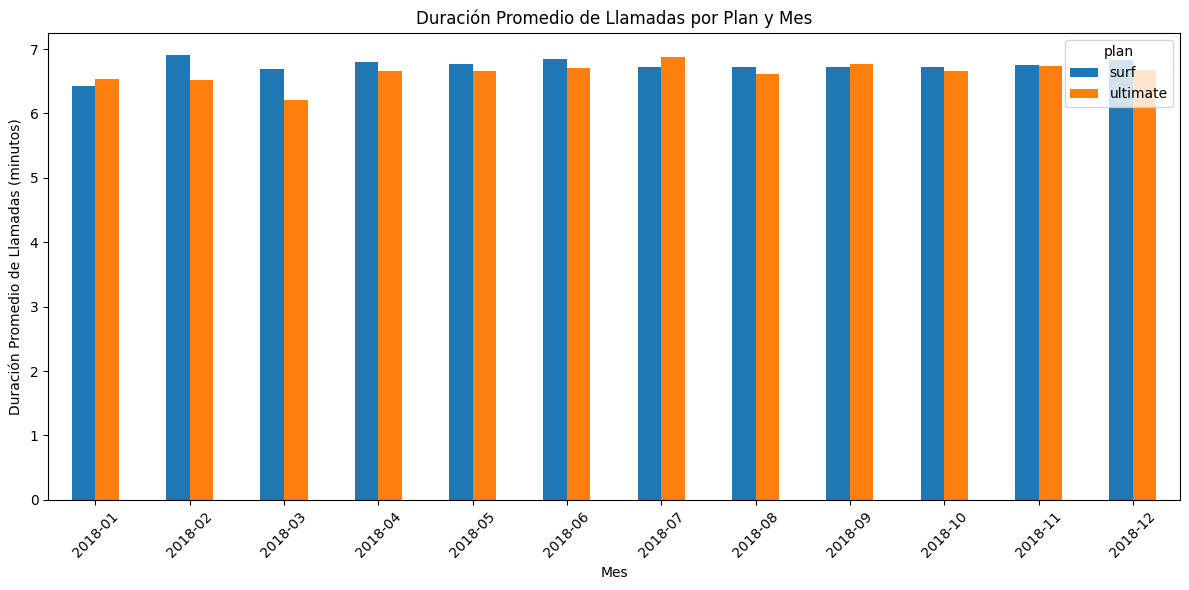

In [64]:
plt.figure(figsize=(12, 6))

for plan in avg_duration_per_month['plan'].unique():
    plan_data = avg_duration_per_month[avg_duration_per_month['plan'] == plan]
    

avg_duration_per_month_pivot.plot(kind='bar', figsize=(12, 6))


plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (minutos)')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

Conclusión:Al extraer los datos sobre las llamadas, aunque no hay diferencia muy marcada en la media y la desvición estandar entre ambos planes, se puede identificar que el plan en donde más llamadas realizarón los usuarios durante el año 2018, es el plan suft, en donde los utuarios realizaron más llamadas en 9 meses comparadado con el plan ultimate en el que solo superó al otro plan en 3 meses por una diferencia minima.

In [65]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

df_calls = df_calls.merge(df_users[['user_id', 'plan']], on='user_id', how='left', suffixes=('', '_plan'))
user_minutes = df_calls.groupby(['user_id', 'plan'])['duration'].sum().reset_index()
user_minutes_pivot = user_minutes.pivot(index='user_id', columns='plan', values='duration')

print(user_minutes_pivot)

plan        surf  ultimate
user_id                   
1000         NaN    116.83
1001     1640.46       NaN
1002      777.13       NaN
1003     1041.00       NaN
1004     2618.95       NaN
...          ...       ...
1495     1666.41       NaN
1496     1376.21       NaN
1497         NaN    276.53
1498     3029.97       NaN
1499     1450.31       NaN

[481 rows x 2 columns]


In [66]:
nulos_surf = user_minutes_pivot[user_minutes_pivot['surf'].isnull()]
nulos_ultimate = user_minutes_pivot[user_minutes_pivot['ultimate'].isnull()]

print("Filas con valores nulos en la columna 'surf':")
print(nulos_surf)

print("\nFilas con valores nulos en la columna 'ultimate':")
print(nulos_ultimate)

Filas con valores nulos en la columna 'surf':
plan     surf  ultimate
user_id                
1000      NaN    116.83
1006      NaN     64.11
1008      NaN   1473.31
1011      NaN   2744.87
1013      NaN    203.37
...       ...       ...
1482      NaN    786.62
1487      NaN    392.71
1490      NaN   2123.33
1493      NaN   2197.37
1497      NaN    276.53

[155 rows x 2 columns]

Filas con valores nulos en la columna 'ultimate':
plan        surf  ultimate
user_id                   
1001     1640.46       NaN
1002      777.13       NaN
1003     1041.00       NaN
1004     2618.95       NaN
1005      470.22       NaN
...          ...       ...
1494     2672.66       NaN
1495     1666.41       NaN
1496     1376.21       NaN
1498     3029.97       NaN
1499     1450.31       NaN

[326 rows x 2 columns]


In [67]:
user_minutes_pivot['surf'].fillna(0, inplace=True)
user_minutes_pivot['ultimate'].fillna(0, inplace=True)


print(user_minutes_pivot)

plan        surf  ultimate
user_id                   
1000        0.00    116.83
1001     1640.46      0.00
1002      777.13      0.00
1003     1041.00      0.00
1004     2618.95      0.00
...          ...       ...
1495     1666.41      0.00
1496     1376.21      0.00
1497        0.00    276.53
1498     3029.97      0.00
1499     1450.31      0.00

[481 rows x 2 columns]


In [68]:
print(user_minutes_pivot.describe())

plan          surf     ultimate
count   481.000000   481.000000
mean   1323.682412   608.022911
std    1613.580774  1265.112025
min       0.000000     0.000000
25%       0.000000     0.000000
50%     777.130000     0.000000
75%    2009.500000   630.580000
max    8950.280000  8024.090000


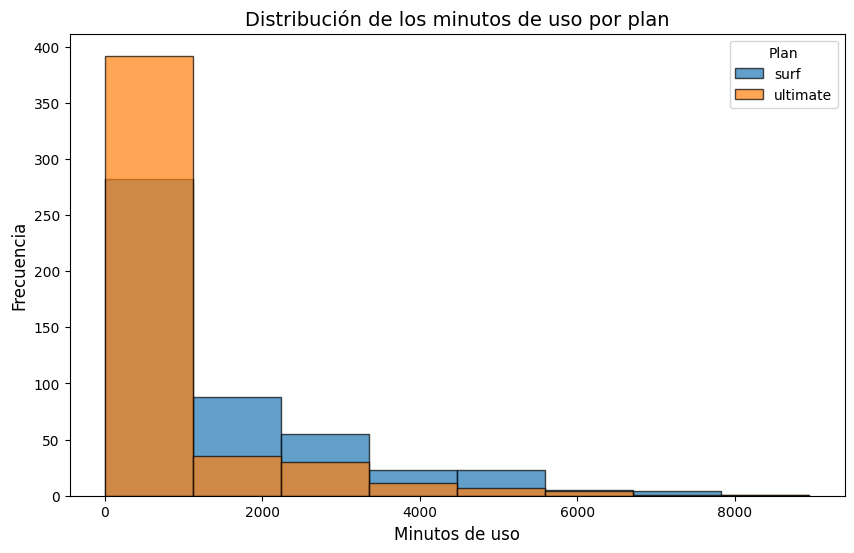

In [69]:
user_minutes_pivot.plot(kind='hist', bins=8, alpha=0.7, figsize=(10, 6), edgecolor='black')

plt.title('Distribución de los minutos de uso por plan', fontsize=14)
plt.xlabel('Minutos de uso', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Plan', labels=user_minutes_pivot.columns, loc='upper right')

plt.show()

Como se puede observar en el histograma anterior, el número de minutos mensuales que los usuarios necesitan más minutos para cada plan, es en el plan ultimate. Al tener datos sesgados hacia la derecha se puede identificar tambien que esto ocurrio en la mayor parte de los 12 meses.

[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [71]:
# Calcula la media y la varianza de la duración mensual de llamadas.


user_minutes = df_calls.groupby(['user_id', 'plan'])['duration'].sum().reset_index()
duration_stats = user_minutes.groupby('plan')['duration'].agg(['mean', 'var']).reset_index()
print(duration_stats)



       plan         mean           var
0      surf  1953.040613  2.612436e+06
1  ultimate  1886.832387  2.560030e+06


<Figure size 1200x600 with 0 Axes>

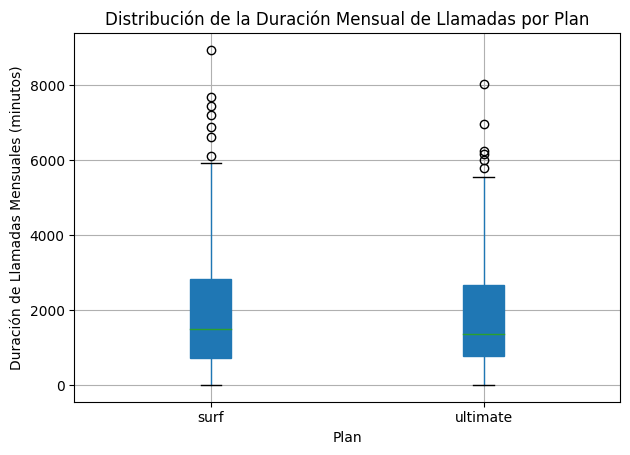

In [72]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

plt.figure(figsize=(12, 6))
user_minutes.boxplot(by='plan', column=['duration'], patch_artist=True)

plt.title('Distribución de la Duración Mensual de Llamadas por Plan')
plt.suptitle('') 
plt.xlabel('Plan')
plt.ylabel('Duración de Llamadas Mensuales (minutos)')
plt.tight_layout()

plt.show()

[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

De acuerdo al diagrama de caja, la mediana de la duración mensual de llamadas en ambos planes es muy similar,
además de que hay valores atípicos en ambos planes, lo que sugiere que algunos usuarios realizan un número significativamente mayor de llamadas que el promedio.
La dispersión es alta, con una gran cantidad de valores por encima del tercer cuartil, lo que indica que hay usuarios que utilizan mucho más minutos de lo que la mayoría de los clientes usan.


Además, aunque el plan Ultimate incluye más minutos en el paquete base (3000 minutos frente a 500 minutos en Surf), la duración media de las llamadas de los usuarios de ambos planes es similar y está por debajo del límite de Ultimate.
Esto nos muestra  que la mayoría de los usuarios, incluso en Ultimate, no consumen la totalidad de los minutos incluidos en su plan.


### Mensajes

In [73]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

df_messages = df_messages.merge(df_users[['user_id', 'plan']], on='user_id', how='left')
df_messages['month'] = df_messages['message_date'].dt.to_period('M')
messages_per_month = df_messages.groupby(['month', 'plan']).size().reset_index(name='message_count')

print(messages_per_month)

      month      plan  message_count
0   2018-01      surf             21
1   2018-01  ultimate             62
2   2018-02      surf            108
3   2018-02  ultimate            151
4   2018-03      surf            351
5   2018-03  ultimate            243
6   2018-04      surf            870
7   2018-04  ultimate            463
8   2018-05      surf           1849
9   2018-05  ultimate            931
10  2018-06      surf           2454
11  2018-06  ultimate           1379
12  2018-07      surf           3271
13  2018-07  ultimate           1937
14  2018-08      surf           4662
15  2018-08  ultimate           2732
16  2018-09      surf           5968
17  2018-09  ultimate           3259
18  2018-10      surf           8020
19  2018-10  ultimate           4181
20  2018-11      surf           9165
21  2018-11  ultimate           4903
22  2018-12      surf          12275
23  2018-12  ultimate           6796


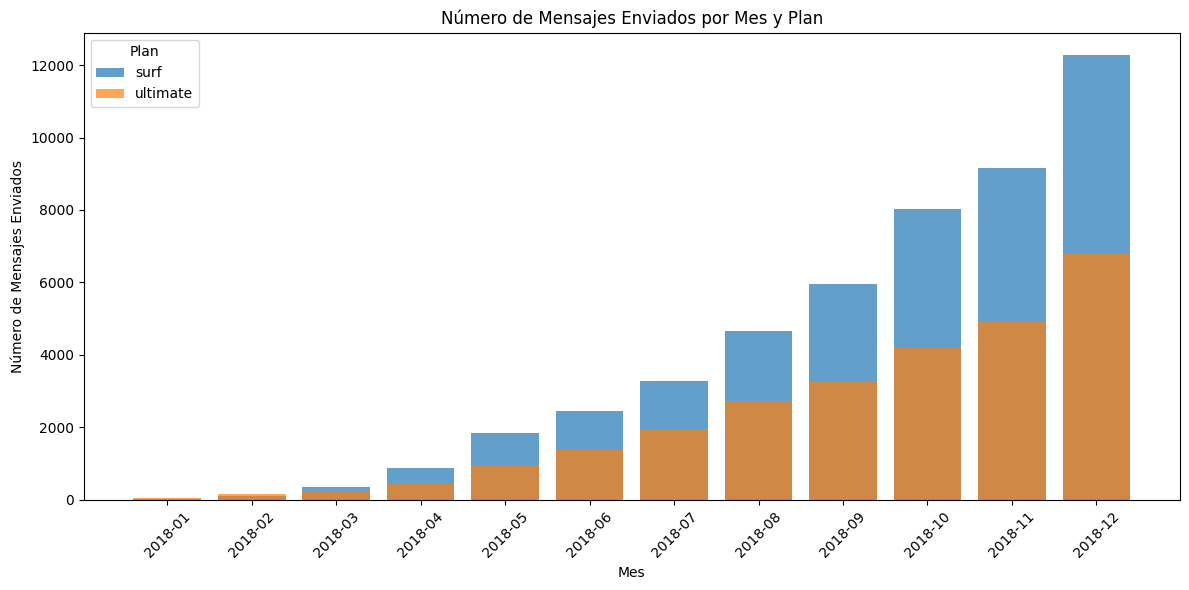

In [74]:
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras apiladas
for plan in messages_per_month['plan'].unique():
    plan_data = messages_per_month[messages_per_month['plan'] == plan]
    plt.bar(plan_data['month'].astype(str), plan_data['message_count'], label=plan, alpha=0.7)

# Personalizar el gráfico
plt.title('Número de Mensajes Enviados por Mes y Plan')
plt.xlabel('Mes')
plt.ylabel('Número de Mensajes Enviados')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()


plt.show()

In [75]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

df_merged = df_users.merge(df_internet, on='user_id')
df_traffic_per_user = df_merged.groupby(['plan', 'user_id'])['mb_used'].sum().reset_index()
df_traffic_by_plan = df_traffic_per_user.groupby('plan')['mb_used'].sum().reset_index()

print(df_traffic_by_plan)



       plan      mb_used
0      surf  26046179.93
1  ultimate  12394583.78


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

Como se puede observar en la gráfica de barras anterior, el plan en el que se tienden a enviar más mensajes por més es el plan surf al igual que en las llamadas. Obteniendo datos sesgados hacia la izquierda y apilados juntos los dos planes se puede notar que en 10 de los 12 meses del 2018 en el plan Surf los usuarios enviaron más mensajes, es decir que el comportamiento del usuario si varía en función de su plan.

### Internet

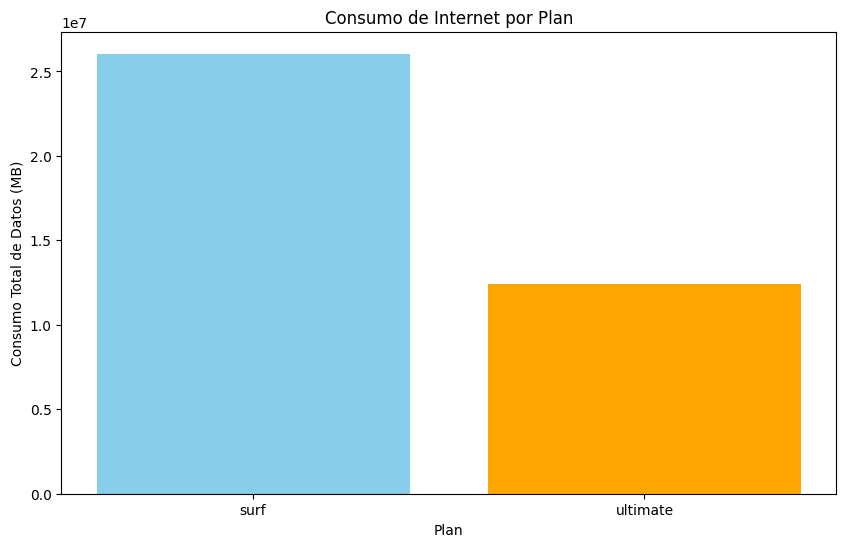

In [76]:
plt.figure(figsize=(10, 6))
plt.bar(df_traffic_by_plan['plan'], df_traffic_by_plan['mb_used'], color=['skyblue', 'orange'])
plt.xlabel('Plan')
plt.ylabel('Consumo Total de Datos (MB)')
plt.title('Consumo de Internet por Plan')
plt.show()

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]


Al obtener el grafico anterior, podemos notar que si varía el consumo de internet entre los usuarios en ambos planes, y que es el plan suft en el que los usuarios consumen más trafico de internet.

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [77]:
df_calls = df_calls.groupby('user_id')['duration'].sum().reset_index()
df_messages = df_messages.groupby('user_id')['id'].count().reset_index()
df_internet = df_internet.groupby('user_id')['mb_used'].sum().reset_index()

In [78]:
df = df_users.merge(df_calls, on='user_id', how='left')
df = df.merge(df_messages, on='user_id', how='left')
df = df.merge(df_internet, on='user_id', how='left')

In [79]:
df = df.merge(df_plans, left_on='plan', right_on='plan_name', how='left')

In [80]:
def calcular_ingreso(row):
    # Ingreso mensual base
    ingreso = row['usd_monthly_pay']  # Cambié 'usd_monthly_fee' por 'usd_monthly_pay'
    
    # Cálculo de excedentes
    if row['duration'] > row['minutes_included']:
        ingreso += (row['duration'] - row['minutes_included']) * row['usd_per_minute']
    if row['id'] > row['messages_included']:
        ingreso += (row['id'] - row['messages_included']) * row['usd_per_message']
    if row['mb_used'] > row['mb_per_month_included']:
        ingreso += (row['mb_used'] - row['mb_per_month_included'] / 1024) * row['usd_per_gb']
    
    return ingreso

In [81]:
df['ingreso'] = df.apply(calcular_ingreso, axis=1)

In [82]:
ingresos_por_plan = df.groupby('plan')['ingreso'].describe()

In [83]:
print(ingresos_por_plan)

          count           mean            std   min        25%          50%  \
plan                                                                          
surf      339.0  759228.841765  612240.834218  20.0  282167.77  621584.6492   
ultimate  161.0  510099.862917  495322.807968  70.0      70.00  409931.2000   

                   75%           max  
plan                                  
surf      1.168762e+06  3.125192e+06  
ultimate  7.461047e+05  2.730975e+06  


In [84]:
varianza_ingresos = df.groupby('plan')['ingreso'].var()
print("Varianza de ingresos por plan:")
print(varianza_ingresos)

Varianza de ingresos por plan:
plan
surf        3.748388e+11
ultimate    2.453447e+11
Name: ingreso, dtype: float64


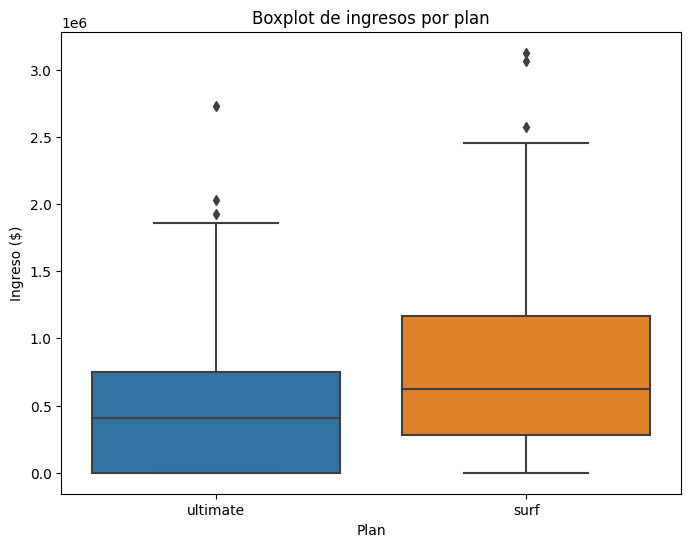

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='plan', y='ingreso', data=df)
plt.title('Boxplot de ingresos por plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso ($)')
plt.show()

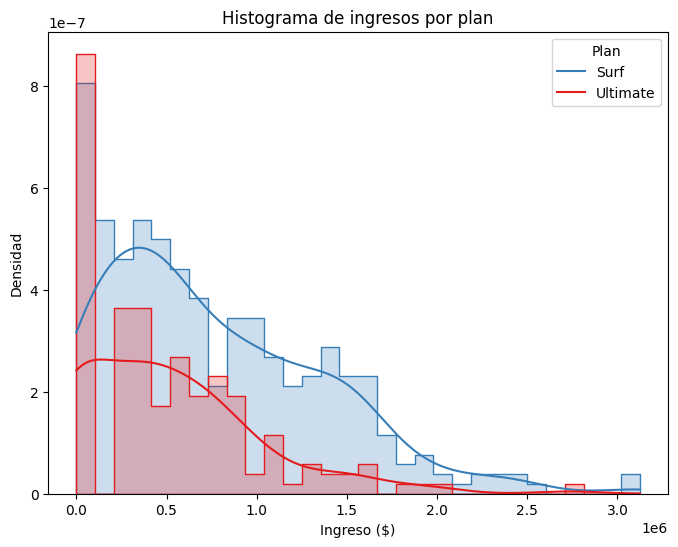

In [85]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='ingreso', hue='plan', kde=True, bins=30, palette='Set1', element='step', stat='density')
plt.title('Histograma de ingresos por plan')
plt.xlabel('Ingreso ($)')
plt.ylabel('Densidad')


plt.legend(title='Plan', labels=['Surf', 'Ultimate'], loc='upper right')

plt.show()

[Describe cómo difiere el ingreso entre los planes]

Despues de analizar la informacíon anterior se puede notar que Surf genera más ingresos en promedio que Ultimate. Generando Suft ingresos en promedio de 759,228 USD mientras que Ultimate solo 510,099 USD. Es decir  que, en términos generales, los usuarios de Surf están pagando más, ya sea porque exceden sus límites con mayor frecuencia o porque hay más clientes en este plan.


En cuanto a la La varianza de ingresos en Surf  es mayor que en Ultimate.
Esto indica que los ingresos en el plan Surf son más dispersos, lo que puede significar que algunos usuarios generan ingresos muy altos mientras que otros generan ingresos más bajos.

Y respecto al grafico bloxplot,  se puede ver que ambos planes tienen varios valores atípicos, lo que sugiere que algunos clientes generan ingresos significativamente superiores al promedio.
La mediana de ingresos en Surf parece ser más alta que la de Ultimate, lo que refuerza la idea de que este plan genera más ingresos en general.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipótesis nula (H₀):
La hipótesis nula es que no hay diferencia significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf.


Hipótesis alternativa (H₁):
La hipótesis alternativa es que sí hay una diferencia significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf.

Hipótesis nula (H₀): No hay diferencia significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf. (Los ingresos promedio de ambos planes son iguales)



Hipótesis alternativa (H₁): Hay una diferencia significativa entre los ingresos promedio de los usuarios de los planes Ultimate y Surf.

In [86]:
# Prueba las hipótesis

df_ultimate = df[df['plan'] == 'Ultimate']['ingreso']
df_surf = df[df['plan'] == 'Surf']['ingreso']

t_stat, p_value = stats.ttest_ind(df_ultimate, df_surf)

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa entre los ingresos promedio de los dos planes.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa entre los ingresos promedio de los dos planes.")



No rechazamos la hipótesis nula: no hay una diferencia significativa entre los ingresos promedio de los dos planes.


In [89]:
df_ultimate = df[df['plan'] == 'ultimate']['ingreso']
df_surf = df[df['plan'] == 'surf']['ingreso']


if df_ultimate.empty or df_surf.empty:
    print("Uno o ambos de los subconjuntos están vacíos. No se puede realizar la prueba.")
else:
    
    t_stat, p_value = stats.ttest_ind(df_ultimate, df_surf)

    alpha = 0.05
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: hay una diferencia significativa entre los ingresos promedio de los dos planes.")
    else:
        print("No rechazamos la hipótesis nula: no hay una diferencia significativa entre los ingresos promedio de los dos planes.")


print("p-value:", p_value)

Rechazamos la hipótesis nula: hay una diferencia significativa entre los ingresos promedio de los dos planes.
p-value: 8.130955326980624e-06


[Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Hipótesis nula (H₀): No hay diferencia significativa entre el ingreso promedio de los usuarios del área NY-NJ y los usuarios de otras regiones.
    
Hipótesis alternativa (H₁): Hay una diferencia significativa entre el ingreso promedio de los usuarios del área NY-NJ y los usuarios de otras regiones.

In [90]:
def clasificar_region(ciudad):
    ciudad = str(ciudad).upper()  
    if 'NY' in ciudad or 'NJ' in ciudad:
        return 'NY-NJ'
    else:
        return 'Otras regiones'


df['region'] = df['city'].apply(clasificar_region)



df_nynj = df[df['region'] == 'NY-NJ']['ingreso']
df_otras = df[df['region'] == 'Otras regiones']['ingreso']


if df_nynj.empty or df_otras.empty:
    print("Uno o ambos de los subconjuntos están vacíos. No se puede realizar la prueba.")
else:
   
    stat_levene, p_value_levene = stats.levene(df_nynj, df_otras)
    
    
    if p_value_levene < 0.05:
        print("Las varianzas son diferentes entre los dos grupos. Usaremos varianzas desiguales para la prueba t.")
        equal_var = False  
    else:
        print("Las varianzas son iguales entre los dos grupos. Usaremos varianzas iguales para la prueba t.")
        equal_var = True  

    
    t_stat, p_value = stats.ttest_ind(df_nynj, df_otras, equal_var=equal_var)

    
    alpha = 0.05
    
    
    if p_value < alpha:
        print("Rechazamos la hipótesis nula: hay una diferencia significativa entre los ingresos promedio de los usuarios de NY-NJ y otras regiones.")
    else:
        print("No rechazamos la hipótesis nula: no hay una diferencia significativa entre los ingresos promedio de los usuarios de NY-NJ y otras regiones.")

    
    print(f"p-value: {p_value}")

Las varianzas son iguales entre los dos grupos. Usaremos varianzas iguales para la prueba t.
No rechazamos la hipótesis nula: no hay una diferencia significativa entre los ingresos promedio de los usuarios de NY-NJ y otras regiones.
p-value: 0.21792797131048658


Conclusión despues de haber analizado el comportamiento general de los usuarios se puede decir que el plan que más ingresos genera es el plan Surf, Aunque el plan Ultimate tiene una tarifa base más alta ($70 vs. $20), los clientes del plan Surf parecen exceder los límites con más frecuencia, lo que genera ingresos adicionales significativos.

Como comentario final, en promedio el plan Surf genera más ingresos que el plan Ultimate por lo que sería el plan más adecuado al que se le puede hacer el ajuste de publicidad. 


A pesar de no haber diferencias significativas entre ambos planes en varios aspectos como por ejemplo, la diferencia en los minutos incluidos en cada plan o el uso real de llamadas es similar entre ambos tipos de usuarios, si varía y se nota la diferencia en otros aspectos como  en el uso de internet, mensajes e ingresos. Siendo superior el plan Surf.

Por otra parte, la dispersión en los ingresos de Surf es mayor, lo que indica que hay una variabilidad significativa entre los clientes.


En cuanto a la estrategia  publicitaria, la empresa podría enfocarse en entender mejor el perfil de los usuarios de Surf que generan ingresos adicionales por excedentes y compararlos con los de ultimate para ver si conviene redirigir a ciertos clientes a un plan más rentable y sobre eso lanzar su nueva publicidad. Además de que para maximizar ingresos, la empresa debería analizar qué factores llevan a los usuarios de Surf a exceder sus límites y generar otro archivo (dataframe) para evaluar si es posible aumentar la rentabilidad del plan ultimate (por ejemplo, ajustando precios o promoviendo su adopción entre usuarios con mayor consumo).



## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]




Para realizar el análisis entre los dos planes se tuvo que limpiar los datos, principalmente convertir los datos object a fechas en formate datetime para facilitar la fúsion de los dataframes y obtener el análisis del comportamiento de los clientes. Además de poder analizar bien los histogramas, boxplox, y datos estadisticos como media, mediana, varianza y desviacion estandar es importante tener conocimiento avanzado en el area de estadistica, ya que en varios puntos se necesitó para llegar a una conclusión de cual era el plan que genera más ingresos y poder obtener una hipotesis nula y alternativa para llegar a una conslusión final.